In [2]:
# importing the necessary libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import sklearn.metrics as metrics
color=sns.color_palette()
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
Default=pd.read_csv('Default.csv')

In [4]:
# retrieving the first five records
Default.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [5]:
# retrieveing the necessary columns
Default=Default[['Employed','Bank Balance','Annual Salary','Defaulted?']]

In [6]:
# renaming the columns
Default.columns=['student','balance','income','default']

In [7]:
Default.head()

,student,balance,income,default
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [8]:
Default.shape

(10000, 4)

In [9]:
# checking the description of columns
Default.describe()

,student,balance,income,default
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


In [10]:
# **********************Univariate Analysis**********************************

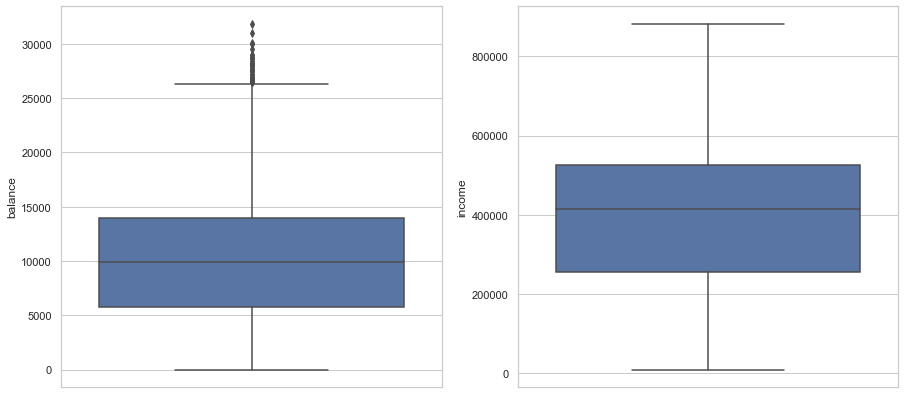

In [11]:
# boxplot for income and balance columns
sns.set(rc={'figure.figsize':(15,7)},style='whitegrid')
plt.subplot(1,2,1)
sns.boxplot(y=Default['balance'],data=Default)
plt.subplot(1,2,2)
sns.boxplot(y='income',data=Default)
plt.show()

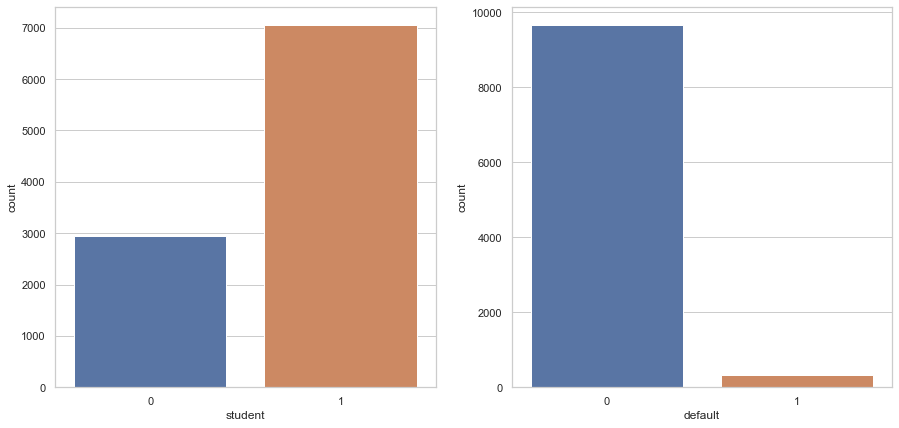

In [12]:
# countplot for students and defaulters columns
sns.set(rc={'figure.figsize':(15,7)},style='whitegrid')
plt.subplot(1,2,1)
sns.countplot('student',data=Default)
plt.subplot(1,2,2)
sns.countplot('default',data=Default)
plt.show()

In [13]:
# getting the number of students
Default[['student']].value_counts()

student
1          7056
0          2944
dtype: int64

In [14]:
# getting the number of defaulters
Default[['default']].value_counts()

default
0          9667
1           333
dtype: int64

In [15]:
# getting the percentage of students
Default[['student']].value_counts(normalize=True)

student
1          0.7056
0          0.2944
dtype: float64

In [16]:
# getting the percentage of defaulters
Default[['default']].value_counts(normalize=True)

default
0          0.9667
1          0.0333
dtype: float64

In [17]:
# ***********************Bi variate Analysis*********************************

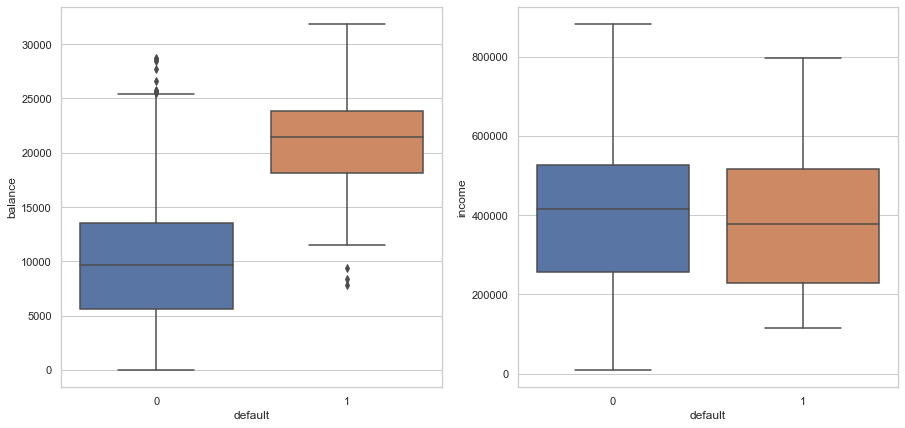

In [18]:
# default comlumn v/s balance column
sns.set(rc={'figure.figsize':(15,7)},style='whitegrid')
plt.subplot(1,2,1)
sns.boxplot(x='default',y='balance',data=Default)
plt.subplot(1,2,2)
sns.boxplot(x='default',y='income',data=Default)
plt.show()

In [19]:
# crosstabulation between students and default columns
pd.crosstab(Default['student'],Default['default'],normalize='index').round(2)

default,0,1
student,,
0,0.96,0.04
1,0.97,0.03


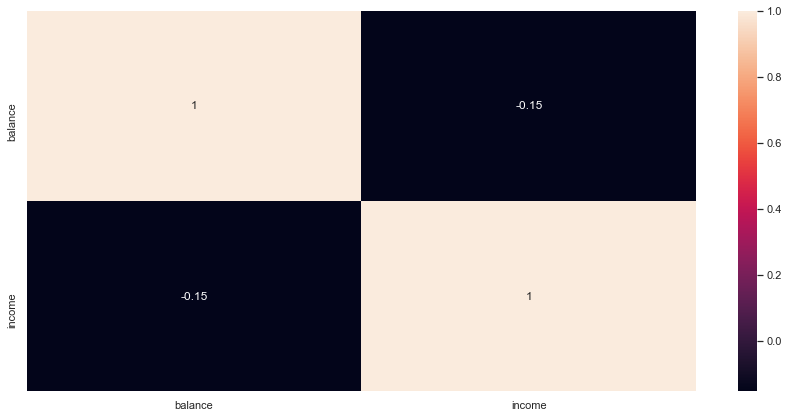

In [22]:
sns.heatmap(Default[['balance','income']].corr(),annot=True)
plt.show()

In [23]:
Default[['student','default']].corr()

,student,default
student,1.00000,-0.03542
default,-0.03542,1.00000


In [25]:
Default[['balance','income']].corr()

,balance,income
balance,1.000000,-0.152243
income,-0.152243,1.000000


In [30]:
# Checking for the null values in the dataset
Default.isnull().sum()

student    0
balance    0
income     0
default    0
dtype: int64

In [53]:
# finding the interquaritile range and removing the outliers
Q1,Q3= Default['balance'].quantile([0.25,0.75])

In [54]:
Q1

5780.79

In [55]:
Q3

13995.66

In [56]:
IQR= Q3-Q1

In [57]:
IQR

8214.869999999999

In [58]:
Default['balance'].max()

31851.84

In [59]:
UL=Q3+1.5*(IQR)

In [60]:
UL

26317.964999999997

In [61]:
LL=Q1-1.5*(IQR)

In [62]:
LL

-6541.5149999999985

In [63]:
Default['balance'].min()

0.0

In [64]:
df=Default[Default['balance']>UL]

In [65]:
df.count()

student    31
balance    31
income     31
default    31
dtype: int64

In [71]:
df['default'].count()

31

In [72]:
df['default'].value_counts(normalize=True)

1    0.83871
0    0.16129
Name: default, dtype: float64

In [73]:
df.value_counts('default')

default
1    26
0     5
dtype: int64

In [75]:
Default['balance']=np.where(Default['balance']>ul,ul,Default['balance'])

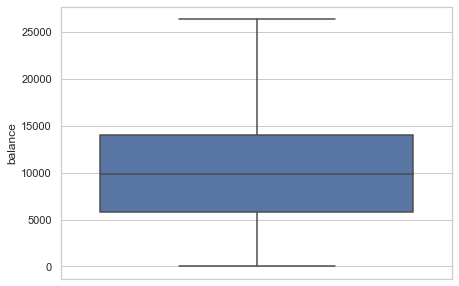

In [83]:
plt.figure(figsize=(7,5))
sns.boxplot(y=Default['balance'])
plt.show()

In [84]:
from sklearn.model_selection import train_test_split

In [94]:
x=Default.drop('default',axis=1)
y=Default[['default']]

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

In [96]:
x_train.shape

(7000, 3)

In [97]:
x_test.shape

(3000, 3)

In [98]:
y_train.value_counts(normalize=True).round(2)

default
0          0.97
1          0.03
dtype: float64

In [99]:
y_test.value_counts(normalize=True).round(2)

default
0          0.97
1          0.03
dtype: float64

In [100]:
type(y_train)

pandas.core.frame.DataFrame

In [102]:
word="hello"
print(*word)

h e l l o
